In [1]:
from atom2vec import AtomSimilarity
import mp_api
from mp_api.client import MPRester

C:\Users\shehr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from pymatgen.core import Lattice, Structure, Element

In [3]:
api_key = 'HUYRyQqHnQMtHihJ6PETXJuI1oLax1HQ'
mpr = MPRester(api_key)

In [4]:
results = mpr.materials.summary.search(fields=["structure"])

Retrieving SummaryDoc documents: 155361it [09:42, 266.78it/s]                             


In [5]:
structures = [entry.structure for entry in results]

In [99]:
atom_similarity = AtomSimilarity.from_structures(structures,
                                                 k_dim=50, max_elements=5)

C:\Users\shehr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pymatgen\core\periodic_table.py:289: UserWarning: No Pauling electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
C:\Users\shehr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pymatgen\core\periodic_table.py:289: UserWarning: No Pauling electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
C:\Users\shehr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pymatgen\core\periodic_table.py:289: UserWarning: No Pauling electronegativity for Ne. Setting to NaN. This has no physical meaning, and 

In [108]:
atom_vector = atom_similarity.get_atom_vector(Element("H"))
atom_vector

[0.0670340433716774,
 -0.4178074300289154,
 0.08626571297645569,
 -0.36352774500846863,
 0.20493914186954498,
 0.3076741695404053,
 -0.2986874282360077,
 0.13111503422260284,
 0.25509217381477356,
 0.3210212290287018,
 -0.11178548634052277,
 0.2006034553050995,
 -0.3963596522808075,
 -0.3029014766216278,
 -0.49410033226013184,
 -0.19031566381454468,
 -0.30285516381263733,
 -0.05706724897027016,
 0.2930237948894501,
 -0.09998726844787598,
 0.31489259004592896,
 0.9282453656196594,
 -0.04583413153886795,
 -0.693199098110199,
 0.4226987361907959,
 1.1143208742141724,
 -0.03674694150686264,
 0.40800005197525024,
 0.004365765955299139,
 1.020472764968872,
 1.2040631771087646,
 -0.9982649683952332,
 -0.4051333963871002,
 1.4900269508361816,
 -5.358443737030029,
 -2.8909411430358887,
 -15.483161926269531,
 -62.091304779052734,
 30.257530212402344,
 -30.59239387512207,
 11.962491035461426,
 6.232193946838379,
 1.3594897985458374,
 6.112297058105469,
 -0.7991094589233398,
 5.88503360748291,
 6.

In [109]:
main_group_elements = []

for elem in Element:
    if elem.group <= 17 and not elem.is_transition_metal:
        main_group_elements.append(elem)

# Print the main group elements (excluding transition metals)
print([el.symbol for el in main_group_elements])

['H', 'H', 'H', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'K', 'Ca', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Rb', 'Sr', 'In', 'Sn', 'Sb', 'Te', 'I', 'Cs', 'Ba', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Fr', 'Ra', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts']


In [110]:
atom_vectors = {}

for elem in main_group_elements:
    try:
        atom_vectors[elem] = atom_similarity.get_atom_vector(elem)
    except KeyError:
        pass
    
print(len(atom_vectors))

53


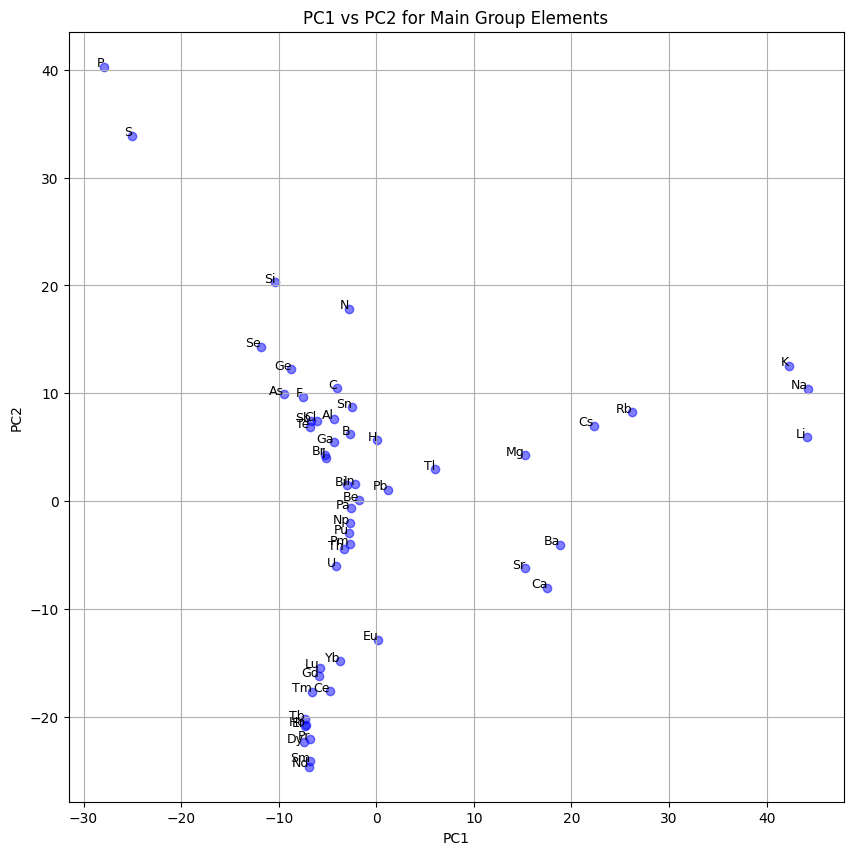

In [111]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

del atom_vectors[Element('O')]

elements = list(atom_vectors.keys())
vectors = list(atom_vectors.values())

pca = PCA(n_components=2)
principal_components = pca.fit_transform(vectors)

# Extract PC1 and PC2
PC1 = principal_components[:, 0]
PC2 = principal_components[:, 1]


# Plot PC1 vs. PC2
plt.figure(figsize=(10, 10))
plt.scatter(PC1, PC2, c='blue', alpha=0.5)

# Add labels for each point
for i, elem in enumerate(elements):
    plt.text(PC1[i], PC2[i], elem.symbol, fontsize=9, ha='right')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 for Main Group Elements')


plt.grid(True)
plt.show()

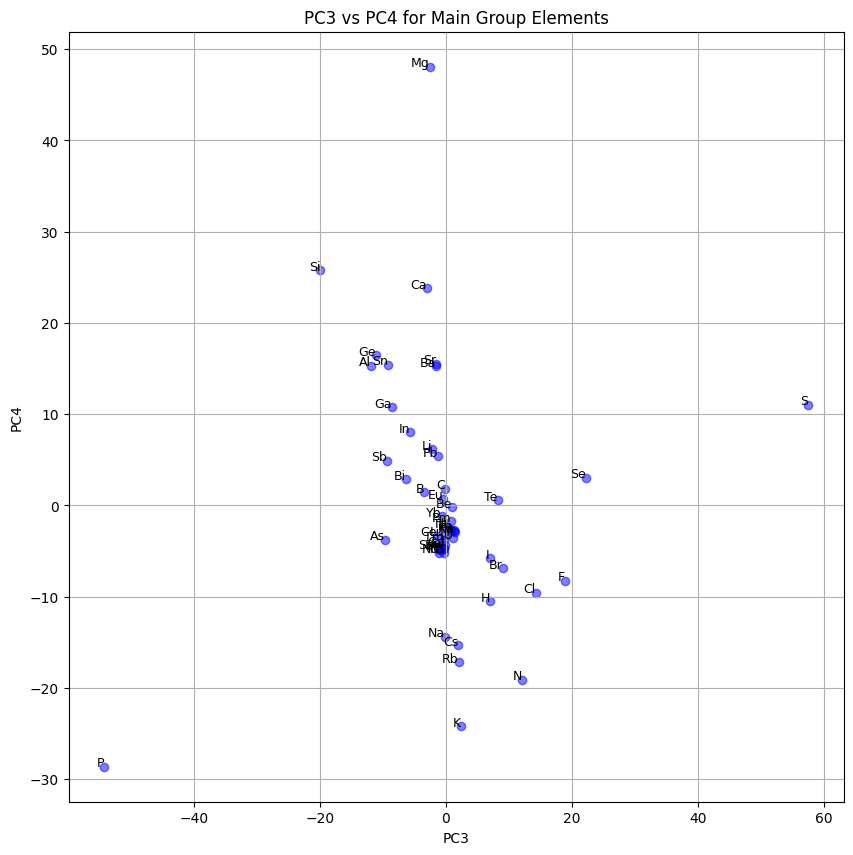

In [112]:
pca = PCA(n_components=4)
principal_components = pca.fit_transform(vectors)

# Extract PC1 and PC2
PC3 = principal_components[:, 2]
PC4 = principal_components[:, 3]


# Plot PC1 vs. PC2
plt.figure(figsize=(10, 10))
plt.scatter(PC3, PC4, c='blue', alpha=0.5)

# Add labels for each point
for i, elem in enumerate(elements):
    plt.text(PC3[i], PC4[i], elem.symbol, fontsize=9, ha='right')

plt.xlabel('PC3')
plt.ylabel('PC4')
plt.title('PC3 vs PC4 for Main Group Elements')


plt.grid(True)
plt.show()